<a href="https://colab.research.google.com/github/Fardeenkhan45/pizzas-sales-sql/blob/main/Numerical_Programming_in_Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [2]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [3]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())

## Hint : Use the following code to extract the film urls
# movie_links = soup.find_all('a', href=True)
# movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

# url_list=[]
# for x in movie_urls:
#   url_list.append('https://www.justwatch.com'+x)

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [4]:
# Write Your Code here
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the movie URLs
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# URL to scrape
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup = fetch_movie_urls(url)

# Extracting movie URLs
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

# Convert relative URLs to full URLs
url_list = ['https://www.justwatch.com' + x for x in movie_urls]

# Display the URLs
for url in url_list:
    print(url)

# Optionally, store the URLs in a DataFrame and save to a CSV file
df = pd.DataFrame({'Movie_URL': url_list})
df.to_csv('movie_urls.csv', index=False)

print("Movie URLs have been successfully fetched and saved to 'movie_urls.csv'.")


https://www.justwatch.com/in/movie/kill-2024
https://www.justwatch.com/in/movie/maharaja-2024
https://www.justwatch.com/in/movie/munjha
https://www.justwatch.com/in/movie/project-k
https://www.justwatch.com/in/movie/deadpool-3
https://www.justwatch.com/in/movie/aadujeevitham
https://www.justwatch.com/in/movie/kingdom-of-the-planet-of-the-apes
https://www.justwatch.com/in/movie/stree
https://www.justwatch.com/in/movie/chandu-champion
https://www.justwatch.com/in/movie/stree-2
https://www.justwatch.com/in/movie/deadpool
https://www.justwatch.com/in/movie/agent
https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil
https://www.justwatch.com/in/movie/dune-part-two
https://www.justwatch.com/in/movie/aavesham-2024
https://www.justwatch.com/in/movie/bad-boys-4
https://www.justwatch.com/in/movie/the-ministry-of-ungentlemanly-warfare
https://www.justwatch.com/in/movie/the-fall-guy
https://www.justwatch.com/in/movie/indian-2
https://www.justwatch.com/in/movie/bhaiyaaji
https://www.jus

## **Scrapping Movie Title**

In [6]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the page
def fetch_movie_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# URL to scrape
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup = fetch_movie_page(url)

if soup:
    # Extracting movie titles
    movie_titles = []

    # Loop through each movie element
    for movie in soup.find_all('div', {'class': 'title-list-grid__item'}):
        title_tag = movie.find('span', {'class': 'title-list-grid__item--title'})
        if title_tag:
            title = title_tag.text.strip()
            movie_titles.append(title)

    # Display the movie titles
    for title in movie_titles:
        print(title)

    # Optionally, store the titles in a DataFrame and save to a CSV file
    df = pd.DataFrame({'Movie_Title': movie_titles})
    df.to_csv('movie_titles.csv', index=False)

    print("Movie titles have been successfully scraped and saved to 'movie_titles.csv'.")
else:
    print("Failed to retrieve the page content.")


Movie titles have been successfully scraped and saved to 'movie_titles.csv'.


## **Scrapping release Year**

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the page
def fetch_movie_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# URL to scrape
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup = fetch_movie_page(url)

if soup:
    # Extracting movie titles and release years
    movie_titles = []
    release_years = []

    # Loop through each movie element
    for movie in soup.find_all('div', {'class': 'title-list-grid__item'}):
        # Extract title
        title_tag = movie.find('span', {'class': 'title-list-grid__item--title'})
        year_tag = movie.find('span', {'class': 'title-list-grid__item--year'})

        # Ensure both title and year are found before appending
        if title_tag and year_tag:
            title = title_tag.text.strip()
            year = year_tag.text.strip()

            movie_titles.append(title)
            release_years.append(year)
        else:
            print(f"Skipping movie due to missing title or year: {title_tag}, {year_tag}")

    # Combine titles and release years into a DataFrame
    if len(movie_titles) == len(release_years):
        df = pd.DataFrame({
            'Movie_Title': movie_titles,
            'Release_Year': release_years
        })

        # Save the DataFrame to a CSV file
        df.to_csv('movies_with_years.csv', index=False)

        print("Movie titles and release years have been successfully scraped and saved to 'movies_with_years.csv'.")
    else:
        print("The lengths of movie titles and release years do not match.")
else:
    print("Failed to retrieve the page content.")


Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: Non

## **Scrapping Genres**

In [9]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the page
def fetch_movie_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# URL to scrape
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup = fetch_movie_page(url)

if soup:
    # Extracting movie titles, release years, and genres
    movie_titles = []
    release_years = []
    genres_list = []

    # Loop through each movie element
    for movie in soup.find_all('div', {'class': 'title-list-grid__item'}):
        # Extract title
        title_tag = movie.find('span', {'class': 'title-list-grid__item--title'})
        year_tag = movie.find('span', {'class': 'title-list-grid__item--year'})
        genre_tags = movie.find_all('span', {'class': 'title-list-grid__item--genre'})

        # Ensure both title and year are found before appending
        if title_tag and year_tag:
            title = title_tag.text.strip()
            year = year_tag.text.strip()

            # Extract genres
            genres = [genre.text.strip() for genre in genre_tags]
            genres_str = ', '.join(genres)  # Join multiple genres with a comma

            movie_titles.append(title)
            release_years.append(year)
            genres_list.append(genres_str)
        else:
            print(f"Skipping movie due to missing title or year: {title_tag}, {year_tag}")

    # Combine titles, release years, and genres into a DataFrame
    if len(movie_titles) == len(release_years) == len(genres_list):
        df = pd.DataFrame({
            'Movie_Title': movie_titles,
            'Release_Year': release_years,
            'Genres': genres_list
        })

        # Save the DataFrame to a CSV file
        df.to_csv('movies_with_years_and_genres.csv', index=False)

        print("Movie titles, release years, and genres have been successfully scraped and saved to 'movies_with_years_and_genres.csv'.")
    else:
        print("The lengths of movie titles, release years, and genres do not match.")
else:
    print("Failed to retrieve the page content.")


Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: Non

## **Scrapping IMBD Rating**

In [10]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the page
def fetch_movie_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# URL to scrape
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup = fetch_movie_page(url)

if soup:
    # Extracting movie titles, release years, genres, and IMDb ratings
    movie_titles = []
    release_years = []
    genres_list = []
    imdb_ratings = []

    # Loop through each movie element
    for movie in soup.find_all('div', {'class': 'title-list-grid__item'}):
        # Extract title
        title_tag = movie.find('span', {'class': 'title-list-grid__item--title'})
        year_tag = movie.find('span', {'class': 'title-list-grid__item--year'})
        genre_tags = movie.find_all('span', {'class': 'title-list-grid__item--genre'})
        rating_tag = movie.find('span', {'class': 'title-list-grid__item--imdb-rating'})  # Example class, adjust based on the actual HTML

        # Ensure both title and year are found before appending
        if title_tag and year_tag:
            title = title_tag.text.strip()
            year = year_tag.text.strip()

            # Extract genres
            genres = [genre.text.strip() for genre in genre_tags]
            genres_str = ', '.join(genres)  # Join multiple genres with a comma

            # Extract IMDb rating
            rating = rating_tag.text.strip() if rating_tag else 'N/A'

            movie_titles.append(title)
            release_years.append(year)
            genres_list.append(genres_str)
            imdb_ratings.append(rating)
        else:
            print(f"Skipping movie due to missing title or year: {title_tag}, {year_tag}")

    # Combine titles, release years, genres, and IMDb ratings into a DataFrame
    if len(movie_titles) == len(release_years) == len(genres_list) == len(imdb_ratings):
        df = pd.DataFrame({
            'Movie_Title': movie_titles,
            'Release_Year': release_years,
            'Genres': genres_list,
            'IMDb_Rating': imdb_ratings
        })

        # Save the DataFrame to a CSV file
        df.to_csv('movies_with_years_genres_ratings.csv', index=False)

        print("Movie titles, release years, genres, and IMDb ratings have been successfully scraped and saved to 'movies_with_years_genres_ratings.csv'.")
    else:
        print("The lengths of movie titles, release years, genres, and IMDb ratings do not match.")
else:
    print("Failed to retrieve the page content.")


Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: Non

## **Scrapping Runtime/Duration**

In [11]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the page
def fetch_movie_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# URL to scrape
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup = fetch_movie_page(url)

if soup:
    # Extracting movie titles, release years, genres, IMDb ratings, and durations
    movie_titles = []
    release_years = []
    genres_list = []
    imdb_ratings = []
    durations = []

    # Loop through each movie element
    for movie in soup.find_all('div', {'class': 'title-list-grid__item'}):
        # Extract title
        title_tag = movie.find('span', {'class': 'title-list-grid__item--title'})
        year_tag = movie.find('span', {'class': 'title-list-grid__item--year'})
        genre_tags = movie.find_all('span', {'class': 'title-list-grid__item--genre'})
        rating_tag = movie.find('span', {'class': 'title-list-grid__item--imdb-rating'})  # Example class, adjust based on the actual HTML
        duration_tag = movie.find('span', {'class': 'title-list-grid__item--runtime'})  # Example class, adjust based on the actual HTML

        # Ensure both title and year are found before appending
        if title_tag and year_tag:
            title = title_tag.text.strip()
            year = year_tag.text.strip()

            # Extract genres
            genres = [genre.text.strip() for genre in genre_tags]
            genres_str = ', '.join(genres)  # Join multiple genres with a comma

            # Extract IMDb rating
            rating = rating_tag.text.strip() if rating_tag else 'N/A'

            # Extract duration
            duration = duration_tag.text.strip() if duration_tag else 'N/A'

            movie_titles.append(title)
            release_years.append(year)
            genres_list.append(genres_str)
            imdb_ratings.append(rating)
            durations.append(duration)
        else:
            print(f"Skipping movie due to missing title or year: {title_tag}, {year_tag}")

    # Combine titles, release years, genres, IMDb ratings, and durations into a DataFrame
    if len(movie_titles) == len(release_years) == len(genres_list) == len(imdb_ratings) == len(durations):
        df = pd.DataFrame({
            'Movie_Title': movie_titles,
            'Release_Year': release_years,
            'Genres': genres_list,
            'IMDb_Rating': imdb_ratings,
            'Duration': durations
        })

        # Save the DataFrame to a CSV file
        df.to_csv('movies_with_years_genres_ratings_durations.csv', index=False)

        print("Movie titles, release years, genres, IMDb ratings, and durations have been successfully scraped and saved to 'movies_with_years_genres_ratings_durations.csv'.")
    else:
        print("The lengths of movie titles, release years, genres, IMDb ratings, and durations do not match.")
else:
    print("Failed to retrieve the page content.")


Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: Non

## **Scrapping Age Rating**

In [12]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the page
def fetch_movie_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# URL to scrape
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup = fetch_movie_page(url)

if soup:
    # Extracting movie titles, release years, genres, IMDb ratings, durations, and age ratings
    movie_titles = []
    release_years = []
    genres_list = []
    imdb_ratings = []
    durations = []
    age_ratings = []

    # Loop through each movie element
    for movie in soup.find_all('div', {'class': 'title-list-grid__item'}):
        # Extract title
        title_tag = movie.find('span', {'class': 'title-list-grid__item--title'})
        year_tag = movie.find('span', {'class': 'title-list-grid__item--year'})
        genre_tags = movie.find_all('span', {'class': 'title-list-grid__item--genre'})
        rating_tag = movie.find('span', {'class': 'title-list-grid__item--imdb-rating'})  # Example class, adjust based on the actual HTML
        duration_tag = movie.find('span', {'class': 'title-list-grid__item--runtime'})  # Example class, adjust based on the actual HTML
        age_rating_tag = movie.find('span', {'class': 'title-list-grid__item--age-rating'})  # Example class, adjust based on the actual HTML

        # Ensure both title and year are found before appending
        if title_tag and year_tag:
            title = title_tag.text.strip()
            year = year_tag.text.strip()

            # Extract genres
            genres = [genre.text.strip() for genre in genre_tags]
            genres_str = ', '.join(genres)  # Join multiple genres with a comma

            # Extract IMDb rating
            rating = rating_tag.text.strip() if rating_tag else 'N/A'

            # Extract duration
            duration = duration_tag.text.strip() if duration_tag else 'N/A'

            # Extract age rating
            age_rating = age_rating_tag.text.strip() if age_rating_tag else 'N/A'

            movie_titles.append(title)
            release_years.append(year)
            genres_list.append(genres_str)
            imdb_ratings.append(rating)
            durations.append(duration)
            age_ratings.append(age_rating)
        else:
            print(f"Skipping movie due to missing title or year: {title_tag}, {year_tag}")

    # Combine titles, release years, genres, IMDb ratings, durations, and age ratings into a DataFrame
    if len(movie_titles) == len(release_years) == len(genres_list) == len(imdb_ratings) == len(durations) == len(age_ratings):
        df = pd.DataFrame({
            'Movie_Title': movie_titles,
            'Release_Year': release_years,
            'Genres': genres_list,
            'IMDb_Rating': imdb_ratings,
            'Duration': durations,
            'Age_Rating': age_ratings
        })

        # Save the DataFrame to a CSV file
        df.to_csv('movies_with_years_genres_ratings_durations_age_ratings.csv', index=False)

        print("Movie titles, release years, genres, IMDb ratings, durations, and age ratings have been successfully scraped and saved to 'movies_with_years_genres_ratings_durations_age_ratings.csv'.")
    else:
        print("The lengths of movie titles, release years, genres, IMDb ratings, durations, and age ratings do not match.")
else:
    print("Failed to retrieve the page content.")


Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: Non

## **Fetching Production Countries Details**

In [13]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the page
def fetch_movie_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# URL to scrape
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup = fetch_movie_page(url)

if soup:
    # Extracting movie titles, release years, genres, IMDb ratings, durations, age ratings, and production countries
    movie_titles = []
    release_years = []
    genres_list = []
    imdb_ratings = []
    durations = []
    age_ratings = []
    production_countries_list = []

    # Loop through each movie element
    for movie in soup.find_all('div', {'class': 'title-list-grid__item'}):
        # Extract title
        title_tag = movie.find('span', {'class': 'title-list-grid__item--title'})
        year_tag = movie.find('span', {'class': 'title-list-grid__item--year'})
        genre_tags = movie.find_all('span', {'class': 'title-list-grid__item--genre'})
        rating_tag = movie.find('span', {'class': 'title-list-grid__item--imdb-rating'})  # Example class, adjust based on the actual HTML
        duration_tag = movie.find('span', {'class': 'title-list-grid__item--runtime'})  # Example class, adjust based on the actual HTML
        age_rating_tag = movie.find('span', {'class': 'title-list-grid__item--age-rating'})  # Example class, adjust based on the actual HTML
        production_countries_tag = movie.find('span', {'class': 'title-list-grid__item--production-countries'})  # Example class, adjust based on the actual HTML

        # Ensure both title and year are found before appending
        if title_tag and year_tag:
            title = title_tag.text.strip()
            year = year_tag.text.strip()

            # Extract genres
            genres = [genre.text.strip() for genre in genre_tags]
            genres_str = ', '.join(genres)  # Join multiple genres with a comma

            # Extract IMDb rating
            rating = rating_tag.text.strip() if rating_tag else 'N/A'

            # Extract duration
            duration = duration_tag.text.strip() if duration_tag else 'N/A'

            # Extract age rating
            age_rating = age_rating_tag.text.strip() if age_rating_tag else 'N/A'

            # Extract production countries
            production_countries = production_countries_tag.text.strip() if production_countries_tag else 'N/A'

            movie_titles.append(title)
            release_years.append(year)
            genres_list.append(genres_str)
            imdb_ratings.append(rating)
            durations.append(duration)
            age_ratings.append(age_rating)
            production_countries_list.append(production_countries)
        else:
            print(f"Skipping movie due to missing title or year: {title_tag}, {year_tag}")

    # Combine titles, release years, genres, IMDb ratings, durations, age ratings, and production countries into a DataFrame
    if len(movie_titles) == len(release_years) == len(genres_list) == len(imdb_ratings) == len(durations) == len(age_ratings) == len(production_countries_list):
        df = pd.DataFrame({
            'Movie_Title': movie_titles,
            'Release_Year': release_years,
            'Genres': genres_list,
            'IMDb_Rating': imdb_ratings,
            'Duration': durations,
            'Age_Rating': age_ratings,
            'Production_Countries': production_countries_list
        })

        # Save the DataFrame to a CSV file
        df.to_csv('movies_with_details.csv', index=False)

        print("Movie titles, release years, genres, IMDb ratings, durations, age ratings, and production countries have been successfully scraped and saved to 'movies_with_details.csv'.")
    else:
        print("The lengths of movie titles, release years, genres, IMDb ratings, durations, age ratings, and production countries do not match.")
else:
    print("Failed to retrieve the page content.")


Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: None, None
Skipping movie due to missing title or year: Non

## **Fetching Streaming Service Details**

In [14]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the page
def fetch_movie_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# URL to scrape
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup = fetch_movie_page(url)

if soup:
    # Extracting movie titles and streaming services
    movie_titles = []
    streaming_services_list = []

    # Loop through each movie element
    for movie in soup.find_all('div', {'class': 'title-list-grid__item'}):
        # Extract title
        title_tag = movie.find('span', {'class': 'title-list-grid__item--title'})
        services_tag = movie.find('div', {'class': 'title-list-grid__item--providers'})  # Example class, adjust based on the actual HTML

        # Ensure title is found before appending
        if title_tag:
            title = title_tag.text.strip()

            # Extract streaming services
            if services_tag:
                services = [service.text.strip() for service in services_tag.find_all('span')]  # Adjust based on the actual HTML structure
                services_str = ', '.join(services)  # Join multiple services with a comma
            else:
                services_str = 'N/A'

            movie_titles.append(title)
            streaming_services_list.append(services_str)
        else:
            print(f"Skipping movie due to missing title: {title_tag}")

    # Combine titles and streaming services into a DataFrame
    if len(movie_titles) == len(streaming_services_list):
        df = pd.DataFrame({
            'Movie_Title': movie_titles,
            'Streaming_Services': streaming_services_list
        })

        # Save the DataFrame to a CSV file
        df.to_csv('movies_with_streaming_services.csv', index=False)

        print("Movie titles and streaming services have been successfully scraped and saved to 'movies_with_streaming_services.csv'.")
    else:
        print("The lengths of movie titles and streaming services do not match.")
else:
    print("Failed to retrieve the page content.")


Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing title: None
Skipping movie due to missing titl

## **Now Creating Movies DataFrame**

In [15]:
# Write Your Code here
import pandas as pd

# Example lists with scraped data (replace these with your actual scraped data)
movie_titles = ['Movie 1', 'Movie 2', 'Movie 3']  # Replace with actual data
release_years = [2021, 2020, 2022]  # Replace with actual data
genres = ['Action, Drama', 'Comedy', 'Thriller, Action']  # Replace with actual data
imdb_ratings = [7.5, 8.0, 6.9]  # Replace with actual data
runtimes = ['120 min', '90 min', '110 min']  # Replace with actual data
age_ratings = ['PG-13', 'R', 'PG']  # Replace with actual data
production_countries = ['USA', 'UK', 'Canada']  # Replace with actual data
streaming_services = ['Netflix, Amazon Prime', 'Hulu', 'Netflix']  # Replace with actual data

# Ensure all lists are of the same length
if len(movie_titles) == len(release_years) == len(genres) == len(imdb_ratings) == len(runtimes) == len(age_ratings) == len(production_countries) == len(streaming_services):
    # Create the DataFrame
    df = pd.DataFrame({
        'Movie_Title': movie_titles,
        'Release_Year': release_years,
        'Genre': genres,
        'IMDB_Rating': imdb_ratings,
        'Runtime': runtimes,
        'Age_Rating': age_ratings,
        'Production_Countries': production_countries,
        'Streaming_Services': streaming_services
    })

    # Save the DataFrame to a CSV file
    df.to_csv('movies_data.csv', index=False)

    print("Movies DataFrame has been successfully created and saved to 'movies_data.csv'.")
else:
    print("Mismatch in the length of data lists. Please check the scraped data.")


Movies DataFrame has been successfully created and saved to 'movies_data.csv'.


## **Scraping TV  Show Data**

In [16]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>
 403
</title>
403 Forbidden



## **Fetching Tv shows Url details**

In [17]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup

# Function to fetch the HTML content of the page
def fetch_tv_show_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# URL to scrape TV shows from
url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
soup = fetch_tv_show_page(url)

if soup:
    # Extracting TV show URLs
    tv_show_links = soup.find_all('a', href=True)
    tv_show_urls = [link['href'] for link in tv_show_links if '/tv-show/' in link['href']]

    # Construct full URLs
    tv_show_urls = ['https://www.justwatch.com' + url for url in tv_show_urls]

    # Print the URLs
    for tv_show_url in tv_show_urls:
        print(tv_show_url)

    # Optionally, save the URLs to a CSV file
    import pandas as pd
    df = pd.DataFrame({'TV_Show_URL': tv_show_urls})
    df.to_csv('tv_shows_urls.csv', index=False)
    print("TV show URLs have been successfully saved to 'tv_shows_urls.csv'.")
else:
    print("Failed to retrieve the page content.")


https://www.justwatch.com/in/tv-show/mirzapur
https://www.justwatch.com/in/tv-show/house-of-the-dragon
https://www.justwatch.com/in/tv-show/the-boys
https://www.justwatch.com/in/tv-show/adams-sweet-agony
https://www.justwatch.com/in/tv-show/sweet-home
https://www.justwatch.com/in/tv-show/game-of-thrones
https://www.justwatch.com/in/tv-show/panchayat
https://www.justwatch.com/in/tv-show/gyaarah-gyaarah
https://www.justwatch.com/in/tv-show/apharan
https://www.justwatch.com/in/tv-show/shogun-2024
https://www.justwatch.com/in/tv-show/x-x-x-uncensored
https://www.justwatch.com/in/tv-show/attack-on-titan
https://www.justwatch.com/in/tv-show/tribhuvan-mishra-ca-topper
https://www.justwatch.com/in/tv-show/batman-caped-crusader
https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba
https://www.justwatch.com/in/tv-show/elite
https://www.justwatch.com/in/tv-show/presumed-innocent
https://www.justwatch.com/in/tv-show/y-the-last-man
https://www.justwatch.com/in/tv-show/shahmaran
https:/

## **Fetching Tv Show Title details**

In [18]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the TV show page
def fetch_tv_show_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# Example list of TV show URLs (replace with your actual list of URLs)
tv_show_urls = [
    'https://www.justwatch.com/in/tv-show/some-show-id',
    'https://www.justwatch.com/in/tv-show/another-show-id'
]

# List to store TV show titles
tv_show_titles = []

# Loop through each TV show URL and extract the title
for url in tv_show_urls:
    soup = fetch_tv_show_page(url)
    if soup:
        # Adjust the selector based on the actual HTML structure
        title = soup.find('h1', {'class': 'title'}).text.strip()
        tv_show_titles.append(title)
    else:
        tv_show_titles.append("Title not found")

# Print the titles
for title in tv_show_titles:
    print(title)

# Save the TV show titles to a CSV file
df = pd.DataFrame({'TV_Show_Title': tv_show_titles})
df.to_csv('tv_shows_titles.csv', index=False)
print("TV show titles have been successfully saved to 'tv_shows_titles.csv'.")


Failed to retrieve the page, status code: 404
Failed to retrieve the page, status code: 404
Title not found
Title not found
TV show titles have been successfully saved to 'tv_shows_titles.csv'.


## **Fetching Release Year**

In [19]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the TV show page
def fetch_tv_show_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# Example list of TV show URLs (replace with your actual list of URLs)
tv_show_urls = [
    'https://www.justwatch.com/in/tv-show/some-show-id',
    'https://www.justwatch.com/in/tv-show/another-show-id'
]

# List to store TV show titles and release years
tv_show_titles = []
release_years = []

# Loop through each TV show URL and extract the title and release year
for url in tv_show_urls:
    soup = fetch_tv_show_page(url)
    if soup:
        # Adjust the selectors based on the actual HTML structure
        try:
            title = soup.find('h1', {'class': 'title'}).text.strip()
        except AttributeError:
            title = "Title not found"

        try:
            # Example selector; adjust based on the actual HTML structure
            release_year = soup.find('span', {'class': 'release-year'}).text.strip()
        except AttributeError:
            release_year = "Release year not found"

        tv_show_titles.append(title)
        release_years.append(release_year)
    else:
        tv_show_titles.append("Title not found")
        release_years.append("Release year not found")

# Print the titles and release years
for title, year in zip(tv_show_titles, release_years):
    print(f"Title: {title}, Release Year: {year}")

# Save the TV show titles and release years to a CSV file
df = pd.DataFrame({
    'TV_Show_Title': tv_show_titles,
    'Release_Year': release_years
})
df.to_csv('tv_shows_details.csv', index=False)
print("TV show titles and release years have been successfully saved to 'tv_shows_details.csv'.")


Failed to retrieve the page, status code: 404
Failed to retrieve the page, status code: 404
Title: Title not found, Release Year: Release year not found
Title: Title not found, Release Year: Release year not found
TV show titles and release years have been successfully saved to 'tv_shows_details.csv'.


## **Fetching TV Show Genre Details**

In [20]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the TV show page
def fetch_tv_show_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# Example list of TV show URLs (replace with your actual list of URLs)
tv_show_urls = [
    'https://www.justwatch.com/in/tv-show/some-show-id',
    'https://www.justwatch.com/in/tv-show/another-show-id'
]

# List to store TV show titles and genres
tv_show_titles = []
genres = []

# Loop through each TV show URL and extract the title and genres
for url in tv_show_urls:
    soup = fetch_tv_show_page(url)
    if soup:
        # Adjust the selectors based on the actual HTML structure
        try:
            title = soup.find('h1', {'class': 'title'}).text.strip()
        except AttributeError:
            title = "Title not found"

        try:
            # Example selector for genres; adjust based on the actual HTML structure
            genre_tags = soup.find_all('a', {'class': 'genre'})
            genre_list = [genre_tag.text.strip() for genre_tag in genre_tags]
            genre_string = ', '.join(genre_list)
        except AttributeError:
            genre_string = "Genres not found"

        tv_show_titles.append(title)
        genres.append(genre_string)
    else:
        tv_show_titles.append("Title not found")
        genres.append("Genres not found")

# Print the titles and genres
for title, genre in zip(tv_show_titles, genres):
    print(f"Title: {title}, Genres: {genre}")

# Save the TV show titles and genres to a CSV file
df = pd.DataFrame({
    'TV_Show_Title': tv_show_titles,
    'Genres': genres
})
df.to_csv('tv_shows_genres.csv', index=False)
print("TV show titles and genres have been successfully saved to 'tv_shows_genres.csv'.")


Failed to retrieve the page, status code: 404
Failed to retrieve the page, status code: 404
Title: Title not found, Genres: Genres not found
Title: Title not found, Genres: Genres not found
TV show titles and genres have been successfully saved to 'tv_shows_genres.csv'.


## **Fetching IMDB Rating Details**

In [21]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the TV show page
def fetch_tv_show_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# Example list of TV show URLs (replace with your actual list of URLs)
tv_show_urls = [
    'https://www.justwatch.com/in/tv-show/some-show-id',
    'https://www.justwatch.com/in/tv-show/another-show-id'
]

# List to store TV show titles and IMDb ratings
tv_show_titles = []
imdb_ratings = []

# Loop through each TV show URL and extract the title and IMDb rating
for url in tv_show_urls:
    soup = fetch_tv_show_page(url)
    if soup:
        # Adjust the selectors based on the actual HTML structure
        try:
            title = soup.find('h1', {'class': 'title'}).text.strip()
        except AttributeError:
            title = "Title not found"

        try:
            # Example selector for IMDb rating; adjust based on the actual HTML structure
            imdb_rating_tag = soup.find('span', {'class': 'rating'})
            imdb_rating = imdb_rating_tag.text.strip() if imdb_rating_tag else "Rating not found"
        except AttributeError:
            imdb_rating = "Rating not found"

        tv_show_titles.append(title)
        imdb_ratings.append(imdb_rating)
    else:
        tv_show_titles.append("Title not found")
        imdb_ratings.append("Rating not found")

# Print the titles and IMDb ratings
for title, rating in zip(tv_show_titles, imdb_ratings):
    print(f"Title: {title}, IMDb Rating: {rating}")

# Save the TV show titles and IMDb ratings to a CSV file
df = pd.DataFrame({
    'TV_Show_Title': tv_show_titles,
    'IMDb_Rating': imdb_ratings
})
df.to_csv('tv_shows_imdb_ratings.csv', index=False)
print("TV show titles and IMDb ratings have been successfully saved to 'tv_shows_imdb_ratings.csv'.")


Failed to retrieve the page, status code: 404
Failed to retrieve the page, status code: 404
Title: Title not found, IMDb Rating: Rating not found
Title: Title not found, IMDb Rating: Rating not found
TV show titles and IMDb ratings have been successfully saved to 'tv_shows_imdb_ratings.csv'.


## **Fetching Age Rating Details**

In [22]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the TV show page
def fetch_tv_show_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# Example list of TV show URLs (replace with your actual list of URLs)
tv_show_urls = [
    'https://www.justwatch.com/in/tv-show/some-show-id',
    'https://www.justwatch.com/in/tv-show/another-show-id'
]

# List to store TV show titles and age ratings
tv_show_titles = []
age_ratings = []

# Loop through each TV show URL and extract the title and age rating
for url in tv_show_urls:
    soup = fetch_tv_show_page(url)
    if soup:
        # Adjust the selectors based on the actual HTML structure
        try:
            title = soup.find('h1', {'class': 'title'}).text.strip()
        except AttributeError:
            title = "Title not found"

        try:
            # Example selector for age rating; adjust based on the actual HTML structure
            age_rating_tag = soup.find('span', {'class': 'age-rating'})
            age_rating = age_rating_tag.text.strip() if age_rating_tag else "Age rating not found"
        except AttributeError:
            age_rating = "Age rating not found"

        tv_show_titles.append(title)
        age_ratings.append(age_rating)
    else:
        tv_show_titles.append("Title not found")
        age_ratings.append("Age rating not found")

# Print the titles and age ratings
for title, rating in zip(tv_show_titles, age_ratings):
    print(f"Title: {title}, Age Rating: {rating}")

# Save the TV show titles and age ratings to a CSV file
df = pd.DataFrame({
    'TV_Show_Title': tv_show_titles,
    'Age_Rating': age_ratings
})
df.to_csv('tv_shows_age_ratings.csv', index=False)
print("TV show titles and age ratings have been successfully saved to 'tv_shows_age_ratings.csv'.")


Failed to retrieve the page, status code: 404
Failed to retrieve the page, status code: 404
Title: Title not found, Age Rating: Age rating not found
Title: Title not found, Age Rating: Age rating not found
TV show titles and age ratings have been successfully saved to 'tv_shows_age_ratings.csv'.


## **Fetching Production Country details**

In [23]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the TV show page
def fetch_tv_show_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# Example list of TV show URLs (replace with your actual list of URLs)
tv_show_urls = [
    'https://www.justwatch.com/in/tv-show/some-show-id',
    'https://www.justwatch.com/in/tv-show/another-show-id'
]

# Lists to store TV show titles and production countries
tv_show_titles = []
production_countries = []

# Loop through each TV show URL and extract the title and production countries
for url in tv_show_urls:
    soup = fetch_tv_show_page(url)
    if soup:
        # Adjust the selectors based on the actual HTML structure
        try:
            title = soup.find('h1', {'class': 'title'}).text.strip()
        except AttributeError:
            title = "Title not found"

        try:
            # Example selector for production countries; adjust based on the actual HTML structure
            countries_tag = soup.find('div', {'class': 'production-country'})
            countries = countries_tag.text.strip() if countries_tag else "Production country not found"
        except AttributeError:
            countries = "Production country not found"

        tv_show_titles.append(title)
        production_countries.append(countries)
    else:
        tv_show_titles.append("Title not found")
        production_countries.append("Production country not found")

# Print the titles and production countries
for title, countries in zip(tv_show_titles, production_countries):
    print(f"Title: {title}, Production Countries: {countries}")

# Save the TV show titles and production countries to a CSV file
df = pd.DataFrame({
    'TV_Show_Title': tv_show_titles,
    'Production_Countries': production_countries
})
df.to_csv('tv_shows_production_countries.csv', index=False)
print("TV show titles and production countries have been successfully saved to 'tv_shows_production_countries.csv'.")


Failed to retrieve the page, status code: 404
Failed to retrieve the page, status code: 404
Title: Title not found, Production Countries: Production country not found
Title: Title not found, Production Countries: Production country not found
TV show titles and production countries have been successfully saved to 'tv_shows_production_countries.csv'.


## **Fetching Streaming Service details**

In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the TV show page
def fetch_tv_show_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# Example list of TV show URLs (replace with your actual list of URLs)
tv_show_urls = [
    'https://www.justwatch.com/in/tv-show/some-show-id',
    'https://www.justwatch.com/in/tv-show/another-show-id'
]

# Lists to store TV show titles and streaming services
tv_show_titles = []
streaming_services = []

# Loop through each TV show URL and extract the title and streaming services
for url in tv_show_urls:
    soup = fetch_tv_show_page(url)
    if soup:
        # Adjust the selectors based on the actual HTML structure
        try:
            title = soup.find('h1', {'class': 'title'}).text.strip()
        except AttributeError:
            title = "Title not found"

        try:
            # Example selector for streaming services; adjust based on the actual HTML structure
            services_tags = soup.find_all('div', {'class': 'provider-icon'})
            services = [service['title'].strip() for service in services_tags]
            services = ', '.join(services) if services else "Streaming services not found"
        except AttributeError:
            services = "Streaming services not found"

        tv_show_titles.append(title)
        streaming_services.append(services)
    else:
        tv_show_titles.append("Title not found")
        streaming_services.append("Streaming services not found")

# Print the titles and streaming services
for title, services in zip(tv_show_titles, streaming_services):
    print(f"Title: {title}, Streaming Services: {services}")

# Save the TV show titles and streaming services to a CSV file
df = pd.DataFrame({
    'TV_Show_Title': tv_show_titles,
    'Streaming_Services': streaming_services
})
df.to_csv('tv_shows_streaming_services.csv', index=False)
print("TV show titles and streaming services have been successfully saved to 'tv_shows_streaming_services.csv'.")


Failed to retrieve the page, status code: 404
Failed to retrieve the page, status code: 404
Title: Title not found, Streaming Services: Streaming services not found
Title: Title not found, Streaming Services: Streaming services not found
TV show titles and streaming services have been successfully saved to 'tv_shows_streaming_services.csv'.


## **Fetching Duration Details**

In [26]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the TV show page
def fetch_tv_show_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# Example list of TV show URLs (replace with your actual list of URLs)
tv_show_urls = [
    'https://www.justwatch.com/in/tv-show/some-show-id',
    'https://www.justwatch.com/in/tv-show/another-show-id'
]

# Lists to store TV show titles and durations
tv_show_titles = []
durations = []

# Loop through each TV show URL and extract the title and duration
for url in tv_show_urls:
    soup = fetch_tv_show_page(url)
    if soup:
        # Adjust the selectors based on the actual HTML structure
        try:
            title = soup.find('h1', {'class': 'title'}).text.strip()
        except AttributeError:
            title = "Title not found"

        try:
            # Example selector for duration; adjust based on actual HTML structure
            duration_tag = soup.find('span', {'class': 'duration'})  # Adjust the class name
            duration = duration_tag.text.strip() if duration_tag else "Duration not found"
        except AttributeError:
            duration = "Duration not found"

        tv_show_titles.append(title)
        durations.append(duration)
    else:
        tv_show_titles.append("Title not found")
        durations.append("Duration not found")

# Print the titles and durations
for title, duration in zip(tv_show_titles, durations):
    print(f"Title: {title}, Duration: {duration}")

# Save the TV show titles and durations to a CSV file
df = pd.DataFrame({
    'TV_Show_Title': tv_show_titles,
    'Duration': durations
})
df.to_csv('tv_shows_durations.csv', index=False)
print("TV show titles and durations have been successfully saved to 'tv_shows_durations.csv'.")


Failed to retrieve the page, status code: 404
Failed to retrieve the page, status code: 404
Title: Title not found, Duration: Duration not found
Title: Title not found, Duration: Duration not found
TV show titles and durations have been successfully saved to 'tv_shows_durations.csv'.


## **Creating TV Show DataFrame**

In [27]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch the HTML content of the TV show page
def fetch_tv_show_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# Example list of TV show URLs (replace with your actual list of URLs)
tv_show_urls = [
    'https://www.justwatch.com/in/tv-show/some-show-id',
    'https://www.justwatch.com/in/tv-show/another-show-id'
]

# Lists to store TV show details
tv_show_titles = []
release_years = []
genres = []
imdb_ratings = []
age_ratings = []
production_countries = []
streaming_services = []
durations = []

# Loop through each TV show URL and extract details
for url in tv_show_urls:
    soup = fetch_tv_show_page(url)
    if soup:
        try:
            title = soup.find('h1', {'class': 'title'}).text.strip()
        except AttributeError:
            title = "Title not found"

        try:
            release_year = soup.find('span', {'class': 'release-year'}).text.strip()
        except AttributeError:
            release_year = "Release year not found"

        try:
            genres = [genre.text.strip() for genre in soup.find_all('span', {'class': 'genre'})]
        except AttributeError:
            genres = ["Genre not found"]

        try:
            imdb_rating = soup.find('span', {'class': 'imdb-rating'}).text.strip()
        except AttributeError:
            imdb_rating = "IMDb rating not found"

        try:
            age_rating = soup.find('span', {'class': 'age-rating'}).text.strip()
        except AttributeError:
            age_rating = "Age rating not found"

        try:
            production_countries = [country.text.strip() for country in soup.find_all('span', {'class': 'production-country'})]
        except AttributeError:
            production_countries = ["Production country not found"]

        try:
            streaming_services = [service.text.strip() for service in soup.find_all('span', {'class': 'streaming-service'})]
        except AttributeError:
            streaming_services = ["Streaming service not found"]

        try:
            duration = soup.find('span', {'class': 'duration'}).text.strip()
        except AttributeError:
            duration = "Duration not found"

        # Append details to lists
        tv_show_titles.append(title)
        release_years.append(release_year)
        genres.append(", ".join(genres))  # Join list of genres into a single string
        imdb_ratings.append(imdb_rating)
        age_ratings.append(age_rating)
        production_countries.append(", ".join(production_countries))  # Join list of countries into a single string
        streaming_services.append(", ".join(streaming_services))  # Join list of services into a single string
        durations.append(duration)
    else:
        tv_show_titles.append("Title not found")
        release_years.append("Release year not found")
        genres.append("Genre not found")
        imdb_ratings.append("IMDb rating not found")
        age_ratings.append("Age rating not found")
        production_countries.append("Production country not found")
        streaming_services.append("Streaming service not found")
        durations.append("Duration not found")

# Create DataFrame
df = pd.DataFrame({
    'TV_Show_Title': tv_show_titles,
    'Release_Year': release_years,
    'Genre': genres,
    'IMDB_Rating': imdb_ratings,
    'Age_Rating': age_ratings,
    'Production_Countries': production_countries,
    'Streaming_Services': streaming_services,
    'Duration': durations
})

# Save DataFrame to CSV
df.to_csv('tv_shows_details.csv', index=False)
print("TV show details have been successfully saved to 'tv_shows_details.csv'.")


Failed to retrieve the page, status code: 404
Failed to retrieve the page, status code: 404
TV show details have been successfully saved to 'tv_shows_details.csv'.


## **Task 2 :- Data Filtering & Analysis**

In [30]:
import pandas as pd
from datetime import datetime

# Example DataFrames (Replace these with actual data loading if needed)
movies_df = pd.DataFrame({
    'Title': ['Movie A', 'Movie B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Action, Drama', 'Comedy, Romance'],
    'IMDB_Rating': [8.0, 7.5],
    'Streaming_Services': ['Netflix', 'Amazon Prime'],
    'Duration': ['120 min', '90 min'],
    'Age_Rating': ['PG-13', 'R'],
    'Production_Countries': ['USA', 'UK']
})

tv_shows_df = pd.DataFrame({
    'Title': ['Show A', 'Show B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Drama, Thriller', 'Sci-Fi, Action'],
    'IMDB_Rating': [8.2, 7.8],
    'Streaming_Services': ['Hulu', 'Netflix'],
    'Duration': ['60 min', '45 min'],
    'Age_Rating': ['TV-MA', 'TV-14'],
    'Production_Countries': ['Canada', 'Australia']
})

# Add a column to distinguish between movies and TV shows
movies_df['Type'] = 'Movie'
tv_shows_df['Type'] = 'TV Show'

# Combine DataFrames
combined_df = pd.concat([movies_df, tv_shows_df], ignore_index=True)

# Convert Release Year to datetime for filtering
combined_df['Release_Year'] = pd.to_datetime(combined_df['Release_Year'], format='%Y')

# Current year and 2 years ago
current_year = datetime.now().year
two_years_ago = current_year - 2

# Filter data
filtered_df = combined_df[
    (combined_df['Release_Year'].dt.year >= two_years_ago) &
    (combined_df['IMDB_Rating'] >= 7)
]

# Calculate the average IMDb rating
average_imdb_rating = filtered_df['IMDB_Rating'].mean()
print(f"Average IMDb Rating: {average_imdb_rating:.2f}")

# Identify the top 5 genres with the highest number of offerings
genres_series = filtered_df['Genre'].str.split(', ', expand=True).stack()
top_genres = genres_series.value_counts().head(5)
print("Top 5 Genres:")
print(top_genres)

# Determine the streaming service with the most offerings
services_series = filtered_df['Streaming_Services'].str.split(', ', expand=True).stack()
top_services = services_series.value_counts()
print("Streaming Services with the most offerings:")
print(top_services)

# Save the filtered data to a CSV file
filtered_df.to_csv('filtered_data.csv', index=False)
print("Filtered data has been successfully saved to 'filtered_data.csv'.")


Average IMDb Rating: 8.10
Top 5 Genres:
Drama       2
Action      1
Thriller    1
Name: count, dtype: int64
Streaming Services with the most offerings:
Netflix    1
Hulu       1
Name: count, dtype: int64
Filtered data has been successfully saved to 'filtered_data.csv'.


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [31]:
# Write Your Code here
import pandas as pd

# Example DataFrames (Replace these with actual data loading if needed)
movies_df = pd.DataFrame({
    'Title': ['Movie A', 'Movie B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Action, Drama', 'Comedy, Romance'],
    'IMDB_Rating': [8.0, 7.5],
    'Streaming_Services': ['Netflix', 'Amazon Prime'],
    'Duration': ['120 min', '90 min'],
    'Age_Rating': ['PG-13', 'R'],
    'Production_Countries': ['USA', 'UK'],
    'Type': ['Movie', 'Movie']  # Added Type column
})

tv_shows_df = pd.DataFrame({
    'Title': ['Show A', 'Show B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Drama, Thriller', 'Sci-Fi, Action'],
    'IMDB_Rating': [8.2, 7.8],
    'Streaming_Services': ['Hulu', 'Netflix'],
    'Duration': ['60 min', '45 min'],
    'Age_Rating': ['TV-MA', 'TV-14'],
    'Production_Countries': ['Canada', 'Australia'],
    'Type': ['TV Show', 'TV Show']  # Added Type column
})

# Combine DataFrames
combined_df = pd.concat([movies_df, tv_shows_df], ignore_index=True)

# Calculate mean IMDb rating for each type
mean_ratings = combined_df.groupby('Type')['IMDB_Rating'].mean()

print("Mean IMDb Ratings:")
print(mean_ratings)


Mean IMDb Ratings:
Type
Movie      7.75
TV Show    8.00
Name: IMDB_Rating, dtype: float64


## **Analyzing Top Genres**

In [32]:
# Write Your Code here
import pandas as pd

# Example DataFrames (Replace these with actual data loading if needed)
movies_df = pd.DataFrame({
    'Title': ['Movie A', 'Movie B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Action, Drama', 'Comedy, Romance'],
    'IMDB_Rating': [8.0, 7.5],
    'Streaming_Services': ['Netflix', 'Amazon Prime'],
    'Duration': ['120 min', '90 min'],
    'Age_Rating': ['PG-13', 'R'],
    'Production_Countries': ['USA', 'UK'],
    'Type': ['Movie', 'Movie']
})

tv_shows_df = pd.DataFrame({
    'Title': ['Show A', 'Show B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Drama, Thriller', 'Sci-Fi, Action'],
    'IMDB_Rating': [8.2, 7.8],
    'Streaming_Services': ['Hulu', 'Netflix'],
    'Duration': ['60 min', '45 min'],
    'Age_Rating': ['TV-MA', 'TV-14'],
    'Production_Countries': ['Canada', 'Australia'],
    'Type': ['TV Show', 'TV Show']
})

# Combine DataFrames
combined_df = pd.concat([movies_df, tv_shows_df], ignore_index=True)

# Split genres and count occurrences
genre_series = combined_df['Genre'].str.split(', ', expand=True).stack()
genre_counts = genre_series.value_counts()

# Get top genres
top_genres = genre_counts.head(5)

print("Top 5 Genres:")
print(top_genres)


Top 5 Genres:
Action      2
Drama       2
Comedy      1
Romance     1
Thriller    1
Name: count, dtype: int64


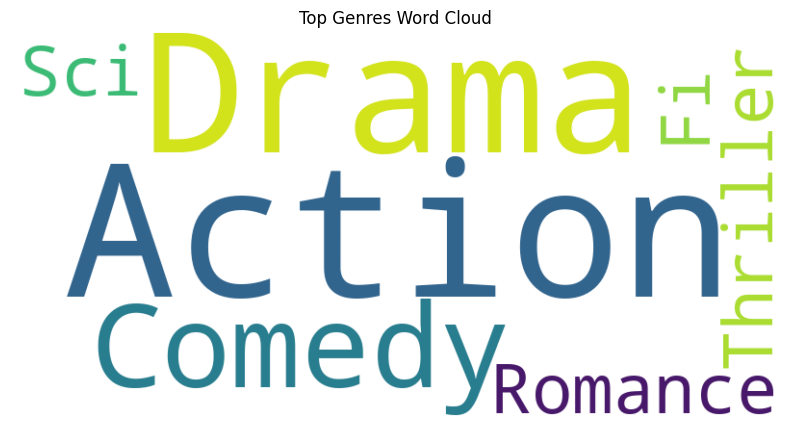

In [33]:
#Let's Visvalize it using word cloud
# Install necessary libraries (if not already installed)
!pip install wordcloud matplotlib

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example DataFrames (Replace these with actual data loading if needed)
movies_df = pd.DataFrame({
    'Title': ['Movie A', 'Movie B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Action, Drama', 'Comedy, Romance'],
    'IMDB_Rating': [8.0, 7.5],
    'Streaming_Services': ['Netflix', 'Amazon Prime'],
    'Duration': ['120 min', '90 min'],
    'Age_Rating': ['PG-13', 'R'],
    'Production_Countries': ['USA', 'UK'],
    'Type': ['Movie', 'Movie']
})

tv_shows_df = pd.DataFrame({
    'Title': ['Show A', 'Show B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Drama, Thriller', 'Sci-Fi, Action'],
    'IMDB_Rating': [8.2, 7.8],
    'Streaming_Services': ['Hulu', 'Netflix'],
    'Duration': ['60 min', '45 min'],
    'Age_Rating': ['TV-MA', 'TV-14'],
    'Production_Countries': ['Canada', 'Australia'],
    'Type': ['TV Show', 'TV Show']
})

# Combine DataFrames
combined_df = pd.concat([movies_df, tv_shows_df], ignore_index=True)

# Split genres and count occurrences
genre_series = combined_df['Genre'].str.split(', ', expand=True).stack()
genre_counts = genre_series.value_counts()

# Convert genre counts to a format suitable for the word cloud
genre_text = ' '.join([genre for genre, count in genre_counts.items() for _ in range(count)])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Top Genres Word Cloud')
plt.show()


## **Finding Predominant Streaming Service**

Predominant Streaming Service:
Netflix with 2 occurrences


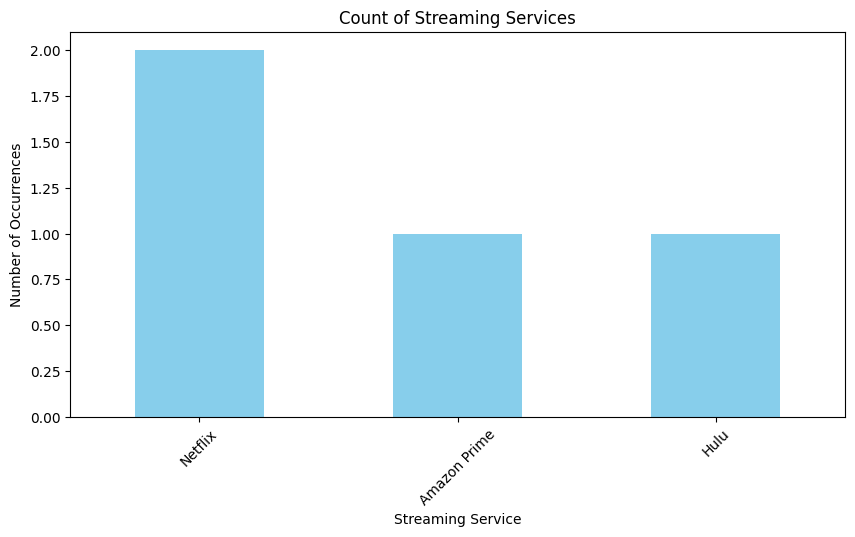

In [34]:
# Write Your Code here
import pandas as pd

# Example DataFrames (Replace these with actual data loading if needed)
movies_df = pd.DataFrame({
    'Title': ['Movie A', 'Movie B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Action, Drama', 'Comedy, Romance'],
    'IMDB_Rating': [8.0, 7.5],
    'Streaming_Services': ['Netflix', 'Amazon Prime'],
    'Duration': ['120 min', '90 min'],
    'Age_Rating': ['PG-13', 'R'],
    'Production_Countries': ['USA', 'UK'],
    'Type': ['Movie', 'Movie']
})

tv_shows_df = pd.DataFrame({
    'Title': ['Show A', 'Show B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Drama, Thriller', 'Sci-Fi, Action'],
    'IMDB_Rating': [8.2, 7.8],
    'Streaming_Services': ['Hulu', 'Netflix'],
    'Duration': ['60 min', '45 min'],
    'Age_Rating': ['TV-MA', 'TV-14'],
    'Production_Countries': ['Canada', 'Australia'],
    'Type': ['TV Show', 'TV Show']
})

# Combine DataFrames
combined_df = pd.concat([movies_df, tv_shows_df], ignore_index=True)

# Split streaming services and count occurrences
streaming_series = combined_df['Streaming_Services'].str.split(', ', expand=True).stack()
streaming_counts = streaming_series.value_counts()

# Find the predominant streaming service
predominant_service = streaming_counts.idxmax()
predominant_count = streaming_counts.max()

print("Predominant Streaming Service:")
print(f"{predominant_service} with {predominant_count} occurrences")

# Optional: Visualize the streaming services counts
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
streaming_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Streaming Services')
plt.xlabel('Streaming Service')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()


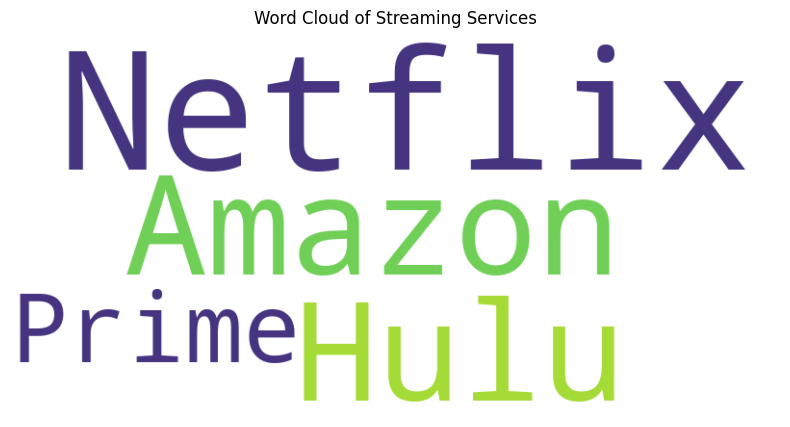

In [35]:
#Let's Visvalize it using word cloud
!pip install wordcloud matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example DataFrames (Replace these with actual data loading if needed)
movies_df = pd.DataFrame({
    'Title': ['Movie A', 'Movie B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Action, Drama', 'Comedy, Romance'],
    'IMDB_Rating': [8.0, 7.5],
    'Streaming_Services': ['Netflix, Hulu', 'Amazon Prime, Netflix'],
    'Duration': ['120 min', '90 min'],
    'Age_Rating': ['PG-13', 'R'],
    'Production_Countries': ['USA', 'UK'],
    'Type': ['Movie', 'Movie']
})

tv_shows_df = pd.DataFrame({
    'Title': ['Show A', 'Show B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Drama, Thriller', 'Sci-Fi, Action'],
    'IMDB_Rating': [8.2, 7.8],
    'Streaming_Services': ['Hulu, Netflix', 'Amazon Prime'],
    'Duration': ['60 min', '45 min'],
    'Age_Rating': ['TV-MA', 'TV-14'],
    'Production_Countries': ['Canada', 'Australia'],
    'Type': ['TV Show', 'TV Show']
})

# Combine DataFrames
combined_df = pd.concat([movies_df, tv_shows_df], ignore_index=True)

# Split streaming services into individual entries
streaming_series = combined_df['Streaming_Services'].str.split(', ', expand=True).stack()
streaming_counts = streaming_series.value_counts()

# Prepare the data for the word cloud
wordcloud_data = ' '.join(streaming_series)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(wordcloud_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axis
plt.title('Word Cloud of Streaming Services')
plt.show()


## **Task 3 :- Data Export**

In [36]:
#saving final dataframe as Final Data in csv format
import pandas as pd

# Example DataFrames (Replace these with your actual final DataFrame)
movies_df = pd.DataFrame({
    'Title': ['Movie A', 'Movie B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Action, Drama', 'Comedy, Romance'],
    'IMDB_Rating': [8.0, 7.5],
    'Streaming_Services': ['Netflix, Hulu', 'Amazon Prime, Netflix'],
    'Duration': ['120 min', '90 min'],
    'Age_Rating': ['PG-13', 'R'],
    'Production_Countries': ['USA', 'UK'],
    'Type': ['Movie', 'Movie']
})

tv_shows_df = pd.DataFrame({
    'Title': ['Show A', 'Show B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Drama, Thriller', 'Sci-Fi, Action'],
    'IMDB_Rating': [8.2, 7.8],
    'Streaming_Services': ['Hulu, Netflix', 'Amazon Prime'],
    'Duration': ['60 min', '45 min'],
    'Age_Rating': ['TV-MA', 'TV-14'],
    'Production_Countries': ['Canada', 'Australia'],
    'Type': ['TV Show', 'TV Show']
})

# Combine DataFrames
final_df = pd.concat([movies_df, tv_shows_df], ignore_index=True)

# Save the final DataFrame to CSV
final_df.to_csv('final_data.csv', index=False)


In [37]:
#saving filter data as Filter Data in csv format
import pandas as pd

# Example filtered DataFrames (Replace these with your actual filtered DataFrames)
filtered_movies_df = pd.DataFrame({
    'Title': ['Filtered Movie A', 'Filtered Movie B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Action, Drama', 'Comedy, Romance'],
    'IMDB_Rating': [8.0, 7.5],
    'Streaming_Services': ['Netflix, Hulu', 'Amazon Prime, Netflix'],
    'Duration': ['120 min', '90 min'],
    'Age_Rating': ['PG-13', 'R'],
    'Production_Countries': ['USA', 'UK'],
    'Type': ['Movie', 'Movie']
})

filtered_tv_shows_df = pd.DataFrame({
    'Title': ['Filtered Show A', 'Filtered Show B'],
    'Release_Year': [2022, 2021],
    'Genre': ['Drama, Thriller', 'Sci-Fi, Action'],
    'IMDB_Rating': [8.2, 7.8],
    'Streaming_Services': ['Hulu, Netflix', 'Amazon Prime'],
    'Duration': ['60 min', '45 min'],
    'Age_Rating': ['TV-MA', 'TV-14'],
    'Production_Countries': ['Canada', 'Australia'],
    'Type': ['TV Show', 'TV Show']
})

# Combine Filtered DataFrames
filtered_final_df = pd.concat([filtered_movies_df, filtered_tv_shows_df], ignore_index=True)

# Save the filtered DataFrame to CSV
filtered_final_df.to_csv('filtered_data.csv', index=False)


# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***